<a href="https://colab.research.google.com/github/jun6000/cats-or-dogs/blob/main/cats_or_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required modules**

In [ ]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import cv2
import imghdr
import numpy as np

**Load dataset**

In [ ]:
import tensorflow_datasets as td
ds = td.load('cats_vs_dogs', split = 'train', shuffle_files = True, as_supervised = True)

**Preprocess Dataset**

In [ ]:
def preprocess_images(img, label):
  img = tf.image.rgb_to_grayscale(img)
  img = tf.image.resize(img, (256, 256))
  img = img / 255.0
  return img, label

data = ds.map(preprocess_images)

In [ ]:
len(data)

23262

In [ ]:
BATCH_SIZE = 32
batches = data.batch(BATCH_SIZE)

In [ ]:
len(batches)

727

In [ ]:
it = batches.as_numpy_iterator()

In [ ]:
batch = it.next()

In [ ]:
batch

(array([[[[0.02962623],
          [0.02613358],
          [0.01871936],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.02962623],
          [0.02613358],
          [0.01871936],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.02962623],
          [0.02613358],
          [0.01871936],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         ...,
 
         [[0.621558  ],
          [0.6212611 ],
          [0.60278034],
          ...,
          [0.45152354],
          [0.4666885 ],
          [0.4627327 ]],
 
         [[0.6137791 ],
          [0.6156611 ],
          [0.6060957 ],
          ...,
          [0.44692862],
          [0.47651875],
          [0.4730589 ]],
 
         [[0.60998774],
          [0.6131434 ],
          [0.60695463],
          ...,
          [0.44313726],
          [0.46007967],
          [0.45579043]]],
 
 
        [

In [ ]:
len(batch[0]), len(batch[1])

(32, 32)

In [ ]:
batch[0].shape

(32, 256, 256, 1)

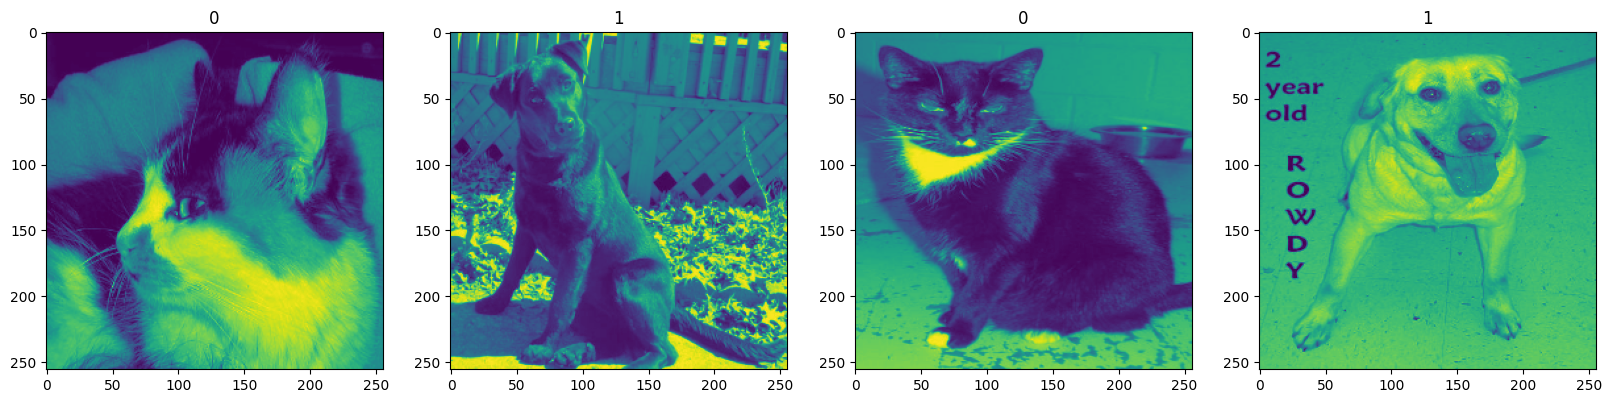

In [ ]:
# Figure out which label is for which data type

fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow((img * 255).astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Cats = 0; Dogs = 1**

In [ ]:
len(batches)

727

In [ ]:
batches_count = len(batches)
train_size = int(batches_count * 0.7)
val_size = int(batches_count * 0.15) + 1
test_size = int(batches_count * 0.15)
train_size + val_size + test_size

727

In [ ]:
train = batches.take(train_size)
val = batches.skip(train_size).take(val_size)
test = batches.skip(train_size + val_size).take(test_size)

In [ ]:
len(val)

110

**Build Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow.keras.regularizers as regularizers

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation = 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (256, 256, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 16)       

**Setup logs**

In [ ]:
log_dir = os.path.join('.', 'logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
history = model.fit(train, epochs = 6, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/6
508/508 [==============================] - 90s 174ms/step - loss: 0.7055 - accuracy: 0.6117 - val_loss: 0.6502 - val_accuracy: 0.6781
Epoch 2/6
508/508 [==============================] - 84s 166ms/step - loss: 0.6195 - accuracy: 0.7097 - val_loss: 0.6000 - val_accuracy: 0.7222
Epoch 3/6
508/508 [==============================] - 78s 154ms/step - loss: 0.5772 - accuracy: 0.7448 - val_loss: 0.5629 - val_accuracy: 0.7506
Epoch 4/6
508/508 [==============================] - 79s 157ms/step - loss: 0.5488 - accuracy: 0.7672 - val_loss: 0.5423 - val_accuracy: 0.7651
Epoch 5/6
508/508 [==============================] - 78s 154ms/step - loss: 0.5277 - accuracy: 0.7832 - val_loss: 0.5295 - val_accuracy: 0.7727
Epoch 6/6
508/508 [==============================] - 79s 156ms/step - loss: 0.5091 - accuracy: 0.7977 - val_loss: 0.5251 - val_accuracy: 0.7858


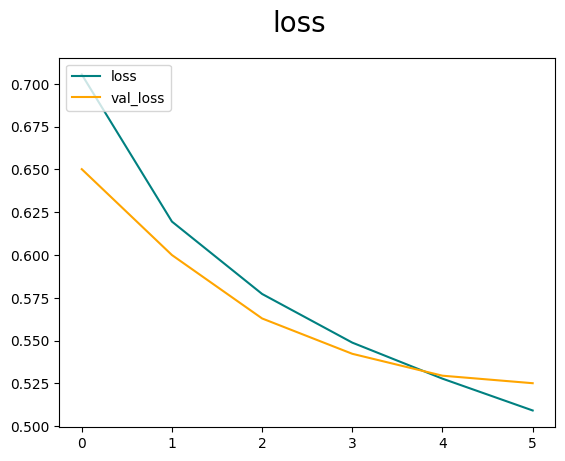

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

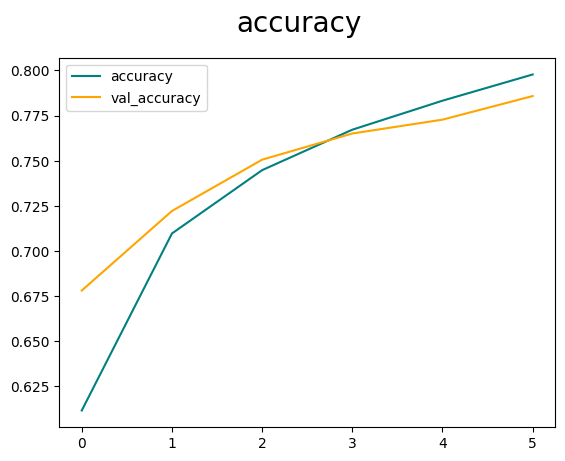

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

**Evaluate Model**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 117ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.7492244243621826, Recall: 0.8318025469779968, Accuracy: 0.7768215537071228


**Test Model**

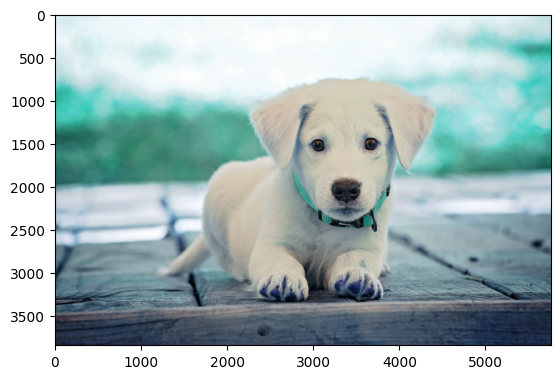

In [ ]:
img1 = cv2.imread('dog_test.jpg')
plt.imshow(img1)

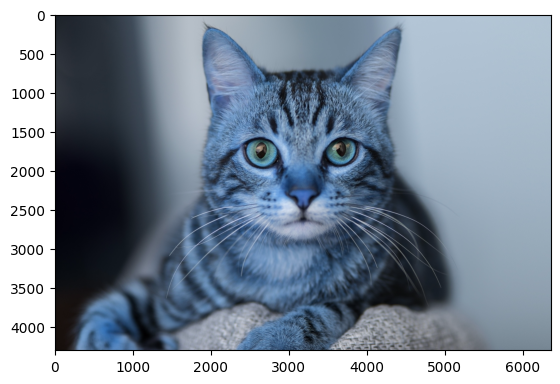

In [ ]:
img2 = cv2.imread('cat_test.jpg')
plt.imshow(img2)

**Resize, grayscale images and predict**

In [ ]:
re_img1 = tf.image.resize(img1, (256, 256))
re_img1 = tf.image.rgb_to_grayscale(re_img1)
re_img2 = tf.image.resize(img2, (256, 256))
re_img2 = tf.image.rgb_to_grayscale(re_img2)

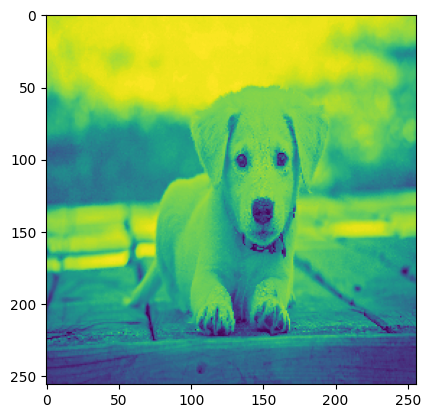

In [ ]:
plt.imshow(re_img1.numpy().astype(int))

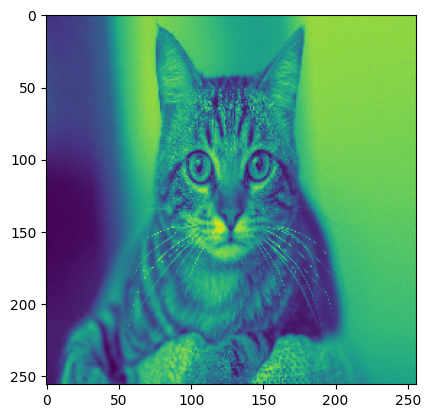

In [ ]:
plt.imshow(re_img2.numpy().astype(int))

In [ ]:
yhat = model.predict(np.expand_dims(re_img1 / 255, 0))
yhat

1/1 [==============================] - 0s 22ms/step


array([[0.77912915]], dtype=float32)

In [ ]:
yhat = model.predict(np.expand_dims(re_img2 / 255, 0))
yhat

1/1 [==============================] - 0s 19ms/step


array([[0.07665065]], dtype=float32)

**Save the model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('cat_or_dog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
